## Prophet is only supported Univariate Data, not Multivariate

# Why we use Prophet Model?

### 1) The advantage of using FB Prophet is we dont have to use DATE as our index of the dataset, we can give DATE column as an input not index.

### 2) But when we are using ARIMA and LSTM, then we have to convert these into index.

### 3) The compulsion with the Prophet Model here, that the DATE column should be renamed as ds and the other column will also be renamed as y. (Otherwise the Model will not work.)

-----------------

# 1) Importing Libraries and Loading the data

In [2]:
import pandas as pd

### Skips the problematic rows and shows a warning for each bad line

In [3]:
df = pd.read_csv('/kaggle/input/daily-minimum-temperatures-in-melbourne/daily-minimum-temperatures-in-me.csv', on_bad_lines='skip')

In [4]:
df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
df.shape

(3650, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Date                                                           3650 non-null   object
 1   Daily minimum temperatures in Melbourne, Australia, 1981-1990  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [7]:
df.rename(columns={'Daily minimum temperatures in Melbourne, Australia, 1981-1990':'Daily minimum temperatures'}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [9]:
df.head()

,Date,Daily minimum temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


--------------

# 2) Data Preprocessing

## i) Checking Null values 

In [10]:
df.isna().sum()

Date                          0
Daily minimum temperatures    0
dtype: int64

In [11]:
df.duplicated().sum()

0

--------------

## ii) Converting DATE column into datetime object

In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 57.2+ KB


-------------

## iii) Converting the datatype of 'Daily min temp' col to float

In [15]:
df[df['Daily minimum temperatures']=='?0.2']

,Date,Daily minimum temperatures
565,1982-07-20,?0.2


#### Keeping only Numerical characters, we are using regular expression

In [16]:
df['Daily minimum temperatures']=df['Daily minimum temperatures'].str.replace(r'[^0-9\.\-]', '', regex=True)

#### After removing these, you can see there are no unsuppported data in our dataset.

In [17]:
df[df['Daily minimum temperatures']=='?0.2']

,Date,Daily minimum temperatures


In [18]:
df['Daily minimum temperatures']=df['Daily minimum temperatures'].astype('float')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


--------

## iv) Renaming the columns for Prophet Model

In [20]:
df.rename(columns={'Date':'ds',
                  'Daily minimum temperatures':'y'},
         inplace=True)

In [21]:
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


-------

# 3) Model Training

In [22]:
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

In [23]:
model=Prophet()

In [24]:
model.fit(df)

10:38:36 - cmdstanpy - INFO - Chain [1] start processing
10:38:36 - cmdstanpy - INFO - Chain [1] done processing


-------------

## 4) Forcasting of the data

#### 1) periods means time interval means if periods =10, then it will further 10 months, 10 week or 10 days
#### 2) Days or Months based on the frequency, as you can see we are using D, so it will be 10 days.

In [25]:
future=model.make_future_dataframe(periods=10, freq='D')

forecast=model.predict(future)

In [27]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.845441,11.580046,18.541168,11.845441,11.845441,3.328357,3.328357,3.328357,0.010971,0.010971,0.010971,3.317386,3.317386,3.317386,0.0,0.0,0.0,15.173798
1,1981-01-02,11.843590,12.026737,18.520325,11.843590,11.843590,3.375348,3.375348,3.375348,-0.019836,-0.019836,-0.019836,3.395184,3.395184,3.395184,0.0,0.0,0.0,15.218939
2,1981-01-03,11.841740,11.786666,18.866014,11.841740,11.841740,3.412345,3.412345,3.412345,-0.060155,-0.060155,-0.060155,3.472501,3.472501,3.472501,0.0,0.0,0.0,15.254085
3,1981-01-04,11.839889,11.593544,18.656323,11.839889,11.839889,3.394984,3.394984,3.394984,-0.153103,-0.153103,-0.153103,3.548087,3.548087,3.548087,0.0,0.0,0.0,15.234873
4,1981-01-05,11.838038,11.943743,18.915602,11.838038,11.838038,3.600999,3.600999,3.600999,-0.019721,-0.019721,-0.019721,3.620720,3.620720,3.620720,0.0,0.0,0.0,15.439037


------------

# 5) PLotting Results

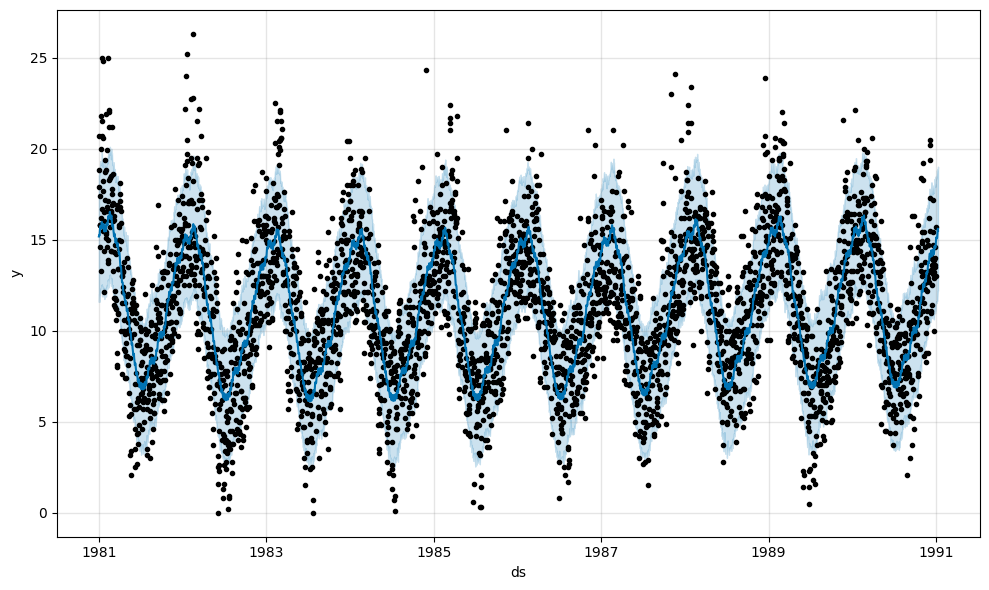

In [28]:
figure=model.plot(forecast)

#### 1) The Light skyblue is showing the maximum range and minimum range in between which the data can fall.

#### 2) The Dark blue is showing the median or the average of the data falling in that particular range

#### 3) The Black points are actually data points.

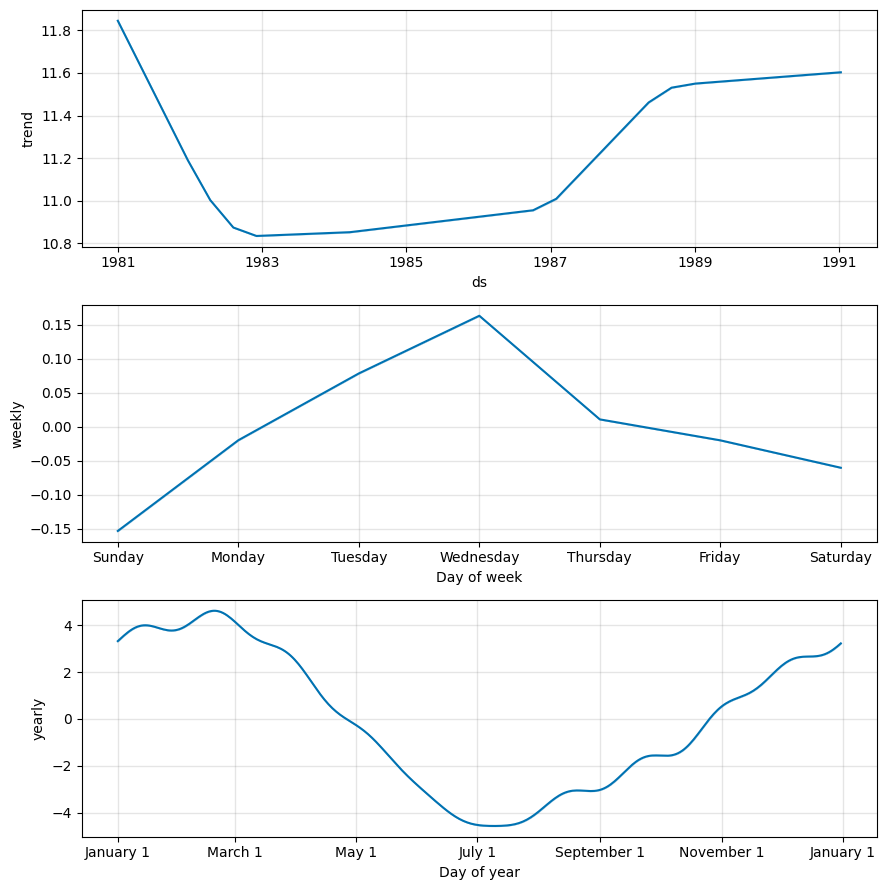

In [30]:
components= model.plot_components(forecast)

----------